In [1]:
from sparsity_util import read_sparsity_info
import numpy as np

# Read SparsityInfo from file

In [47]:
b = read_sparsity_info('block1_pw_output1.psi')

In [46]:
np.average(b.avg)

0.17395935341688162

In [48]:
b.shape

(64, 112, 112)

In [45]:
b1 = b.slice_batch(1, 128).tile((1,7,7))
b2 = b.slice_batch(128, 256).tile((1,7,7))

KeyboardInterrupt: 

# Visualize

In [7]:
%matplotlib notebook

from sparsity_util import SparsityMap3D, SparsityMap2D, SparsityMap1D

In [8]:
b1_map = SparsityMap3D(b1.avg)
b2_map = SparsityMap3D(b2.avg)

<IPython.core.display.Javascript object>


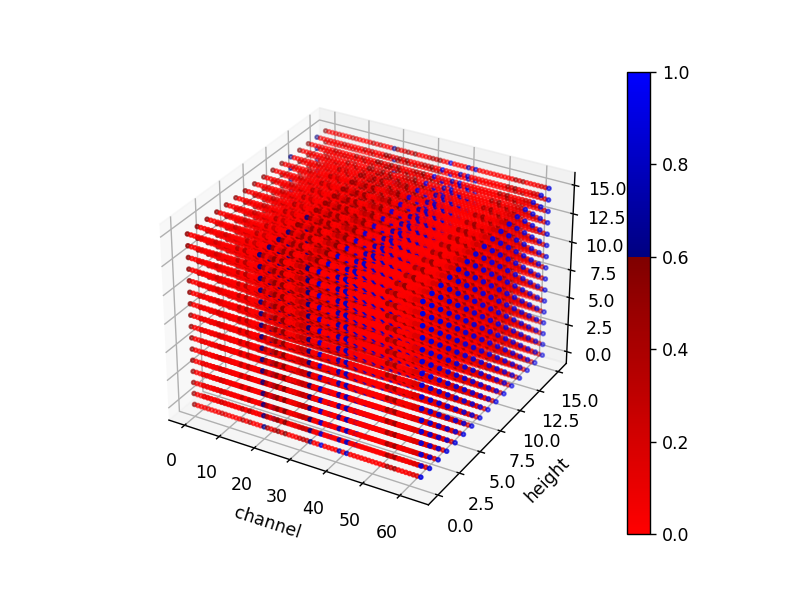

In [9]:
fig = b1_map.draw()

<IPython.core.display.Javascript object>


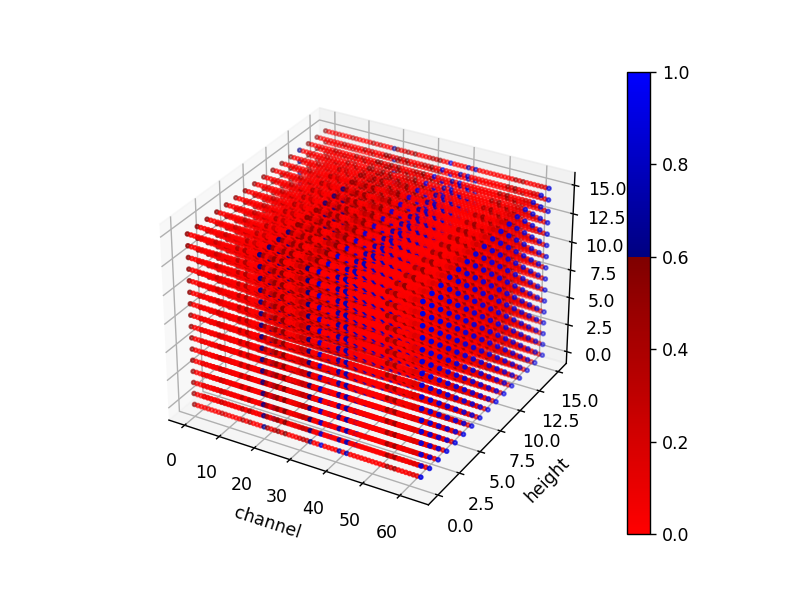

<IPython.core.display.Javascript object>


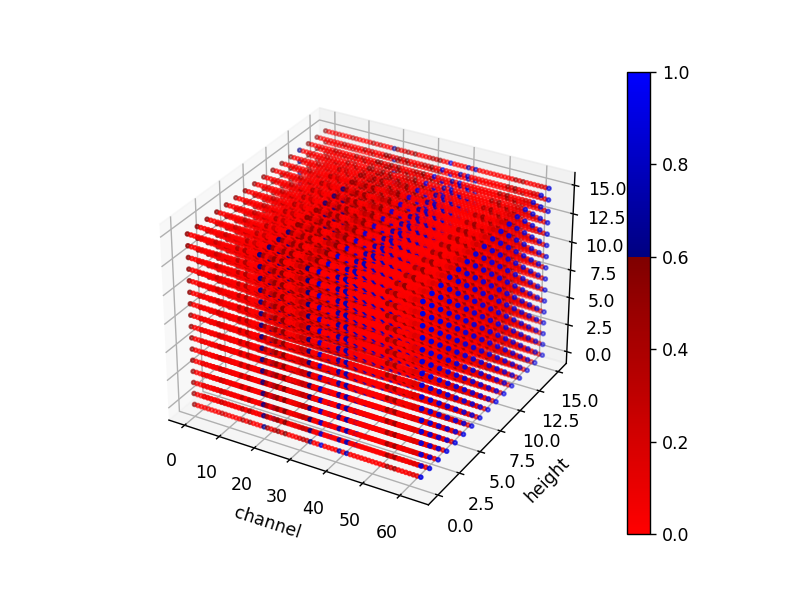

In [10]:
b2_map.draw()

# Sparsity Data on Channels

In [49]:
channel_avg1 = SparsityMap1D(b.slice_batch(0,128).group_by('channel').avg)
channel_avg2 = SparsityMap1D(b.slice_batch(128,256).group_by('channel').avg)

In [50]:
channel_avg1.sparsity_tensor

array([5.22938008e-01, 4.48776557e-02, 3.67176289e-02, 2.19795071e-02,
       1.62704779e-01, 8.40603575e-03, 2.61797224e-02, 4.83043437e-02,
       3.07323222e-01, 1.77327682e-01, 1.93275919e-02, 2.12003747e-03,
       4.25564513e-03, 1.19703643e-03, 4.20864183e-01, 6.20378767e-03,
       3.24722601e-01, 1.40380859e-03, 1.41564194e-03, 3.99842554e-04,
       5.62290114e-01, 5.12169663e-01, 7.64677087e-02, 1.77753682e-01,
       4.80925891e-01, 5.07544693e-02, 5.61900859e-01, 5.79211177e-05,
       2.61454680e-03, 4.65860172e-03, 1.29526566e-01, 3.78999048e-01,
       1.94213244e-01, 5.83295550e-01, 9.38882633e-03, 1.75874671e-02,
       9.29179289e-01, 3.65774972e-03, 8.20300044e-03, 6.64286711e-03,
       2.76526626e-04, 8.05431755e-01, 5.55980449e-03, 8.78062346e-01,
       3.17631936e-05, 3.36820641e-02, 7.79132454e-04, 1.44914900e-02,
       7.94702647e-04, 1.28024354e-02, 5.09456712e-04, 1.74386161e-04,
       6.43983179e-03, 5.37607621e-03, 4.50468725e-01, 1.21534075e-01,
      

<IPython.core.display.Javascript object>


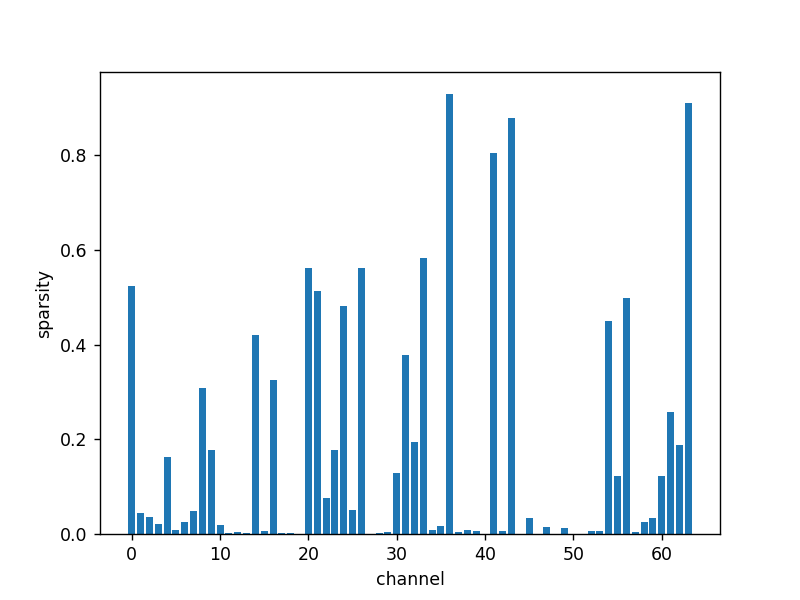

<IPython.core.display.Javascript object>


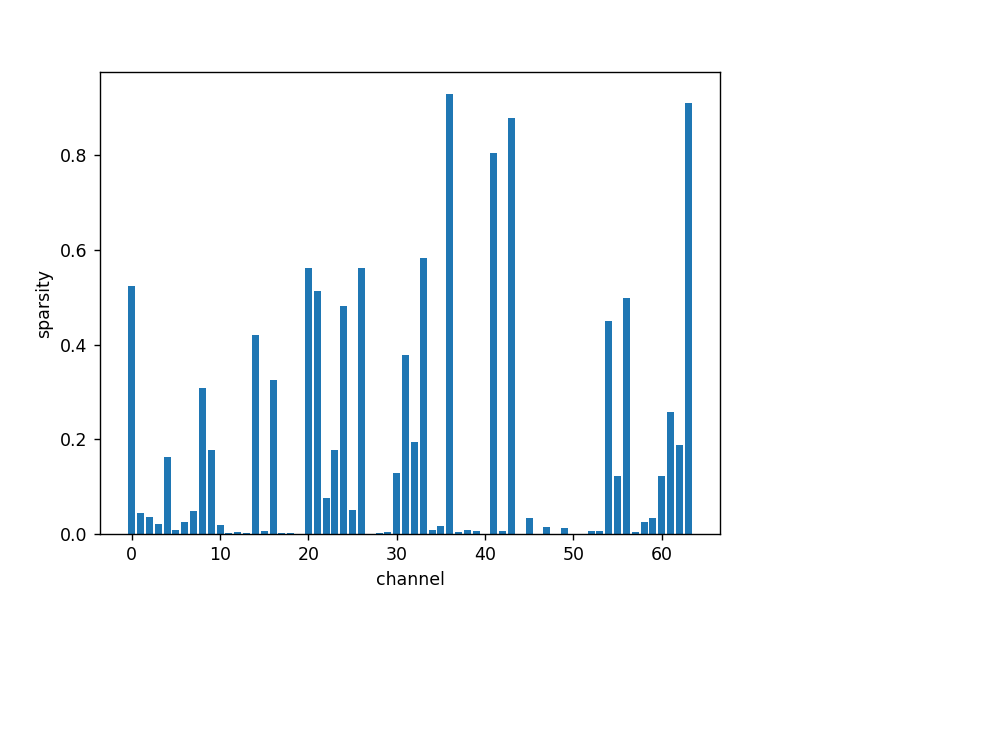

In [51]:
channel_avg1.draw()

<IPython.core.display.Javascript object>


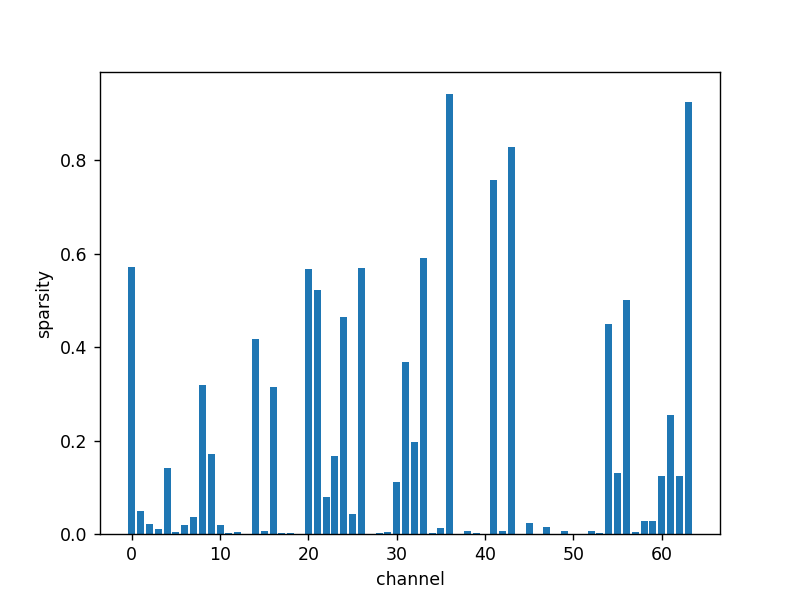

<IPython.core.display.Javascript object>


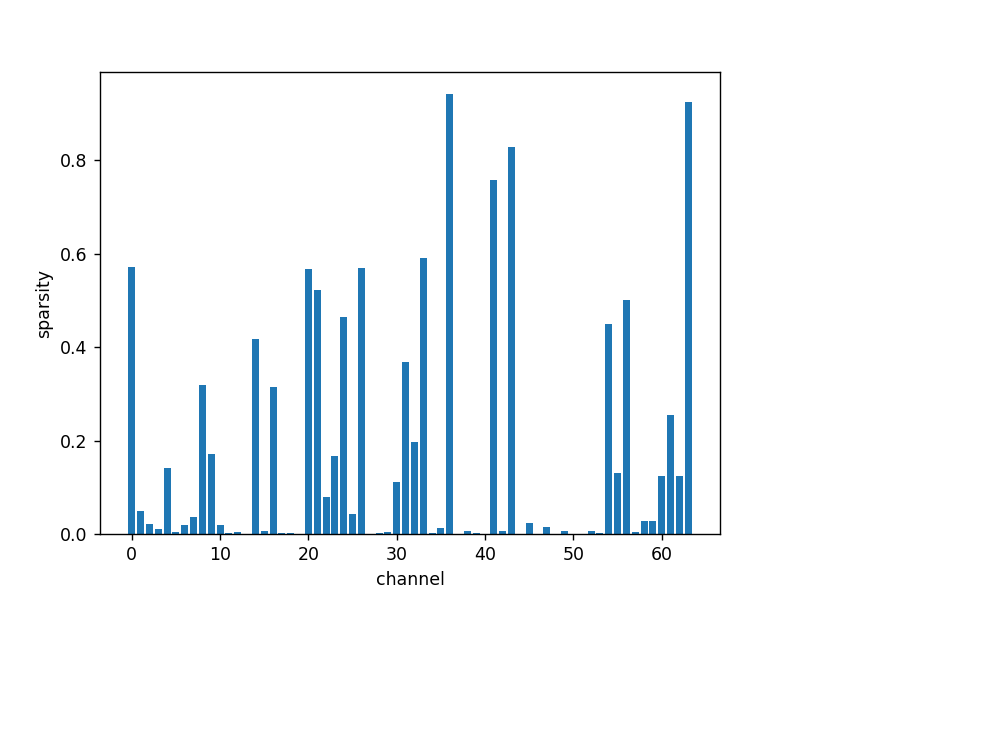

In [52]:
channel_avg2.draw()

# Tile in Height/Width Dim

In [17]:
M2D = SparsityMap2D(b.avg[0, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


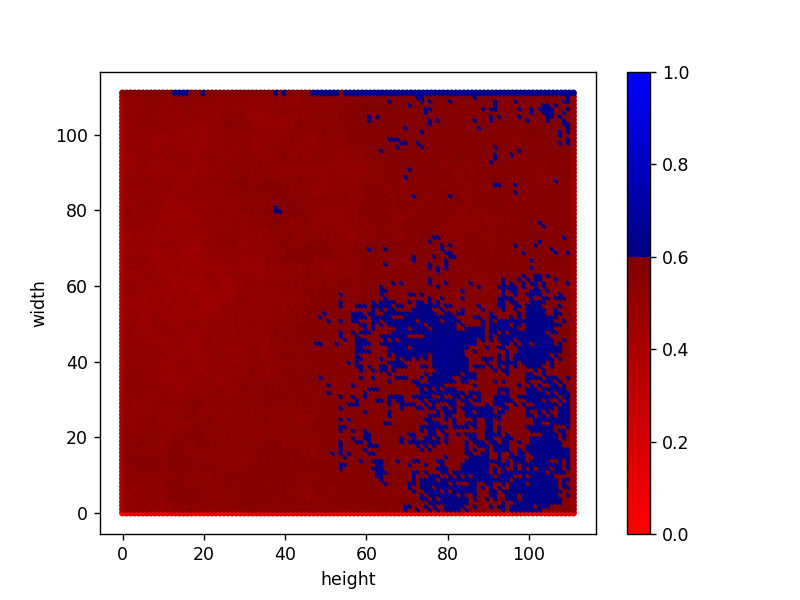

<IPython.core.display.Javascript object>


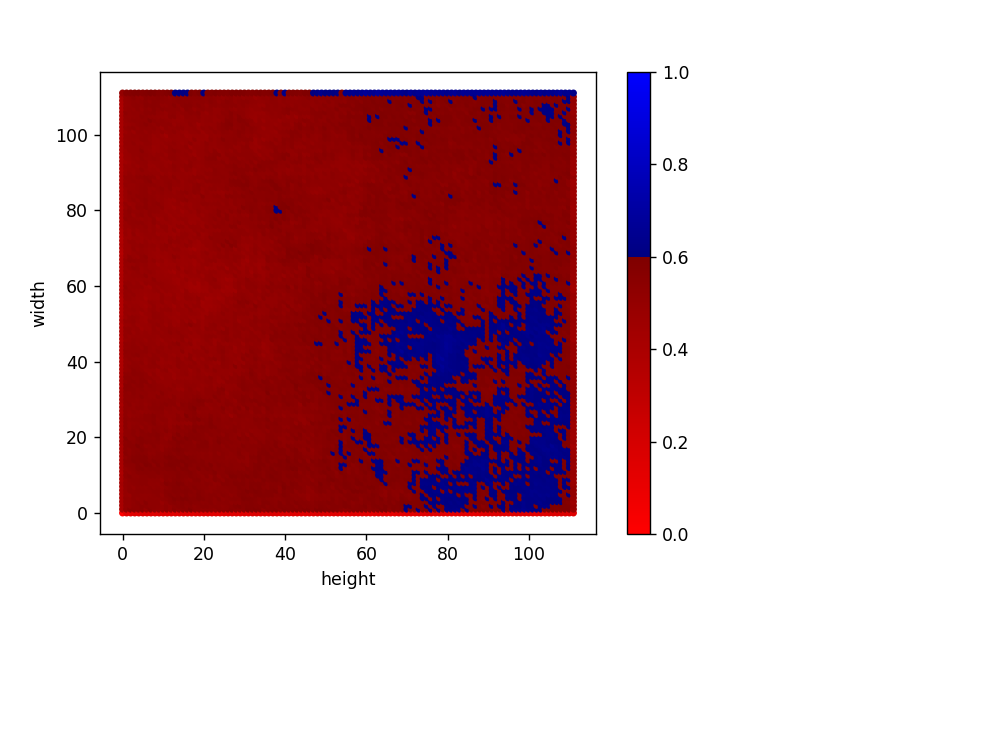

In [18]:
M2D.draw()

In [19]:
M2D_var1 = SparsityMap2D(b.slice_batch(0,128).avg[0, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])
M2D_var2 = SparsityMap2D(b.slice_batch(128,256).avg[0, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


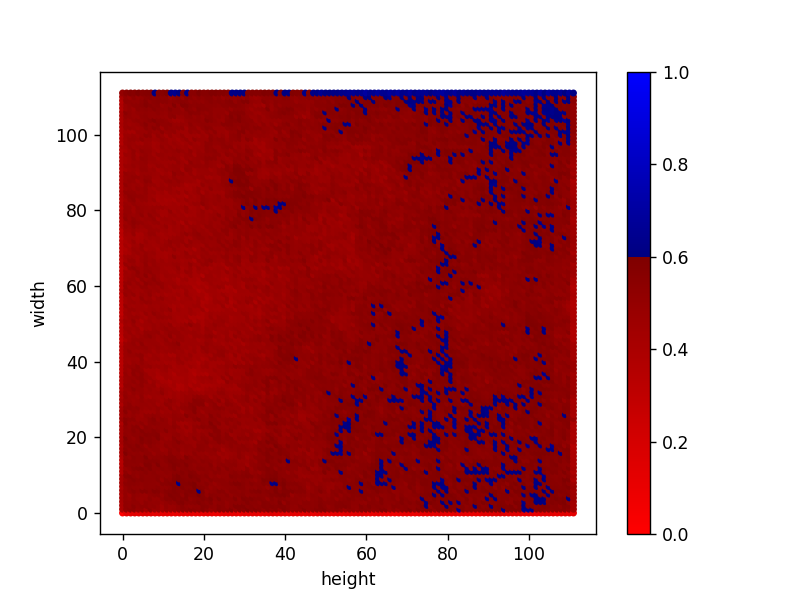

<IPython.core.display.Javascript object>


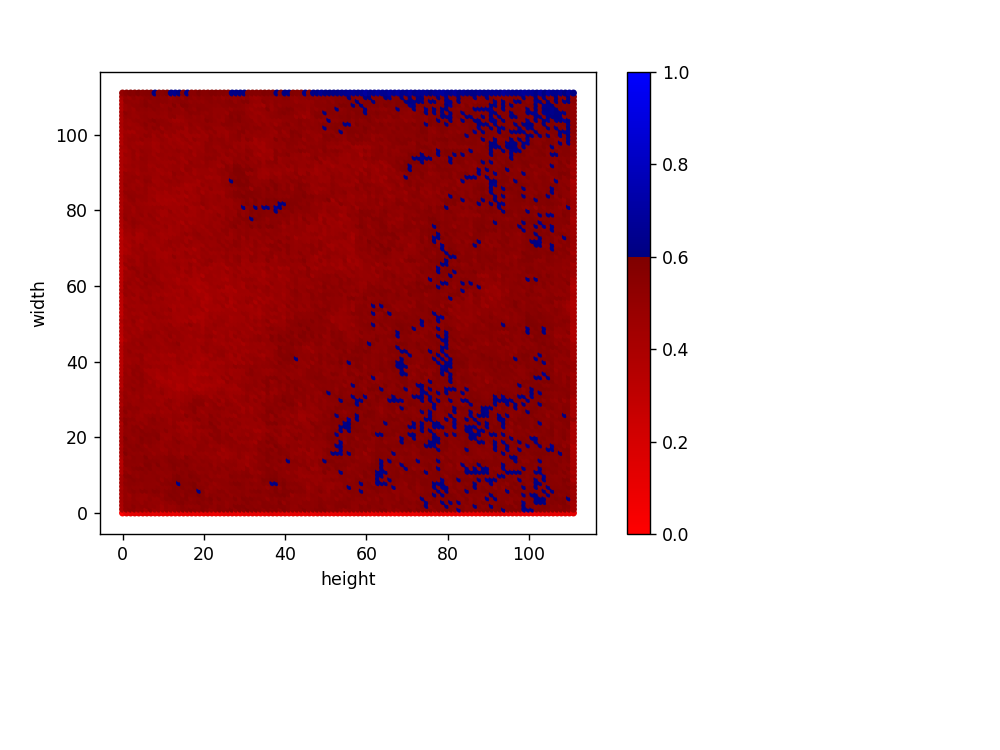

In [20]:
M2D_var1.draw()

<IPython.core.display.Javascript object>


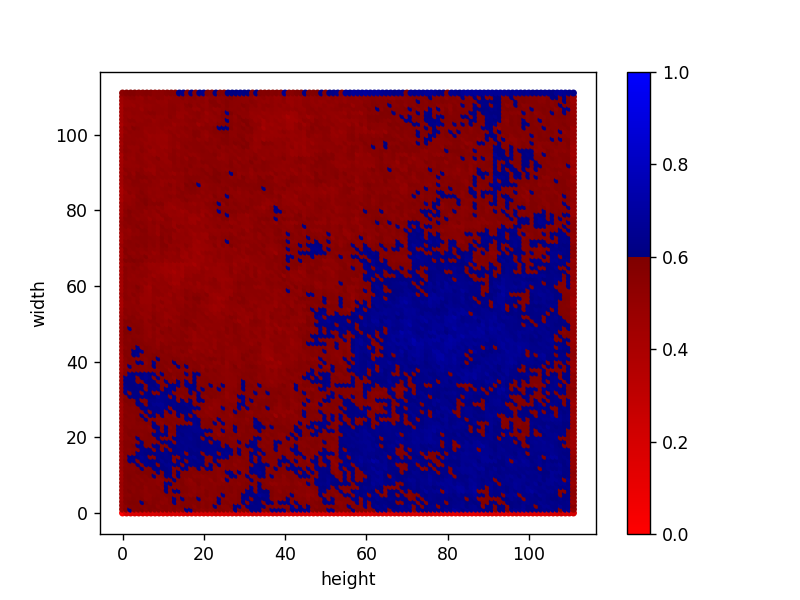

<IPython.core.display.Javascript object>


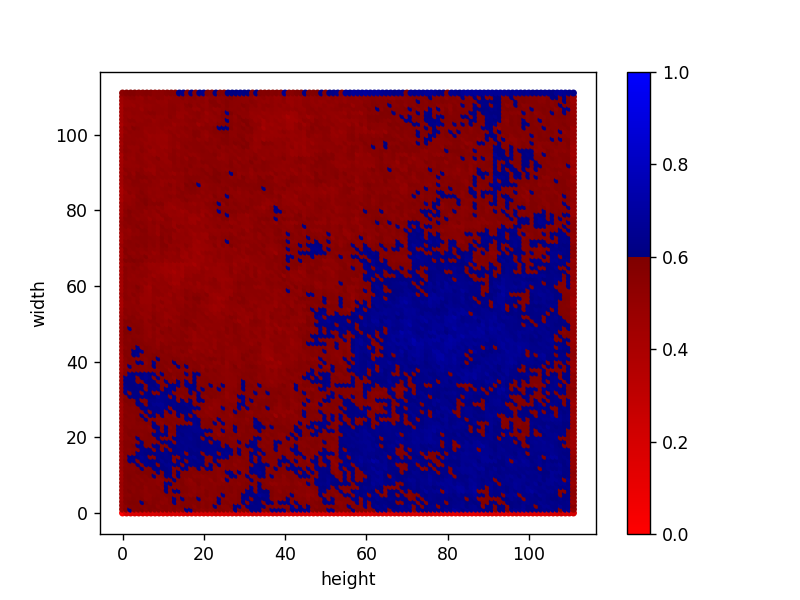

In [21]:
M2D_var2.draw()

# Weight Analysis

In [53]:
import torch
net = torch.load('/home/yzf/download/mobilenetv3_large_100_ra-f55367f5.pth')

In [54]:
net.keys()

odict_keys(['conv_stem.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'blocks.0.0.conv_dw.weight', 'blocks.0.0.bn1.weight', 'blocks.0.0.bn1.bias', 'blocks.0.0.bn1.running_mean', 'blocks.0.0.bn1.running_var', 'blocks.0.0.bn1.num_batches_tracked', 'blocks.0.0.conv_pw.weight', 'blocks.0.0.bn2.weight', 'blocks.0.0.bn2.bias', 'blocks.0.0.bn2.running_mean', 'blocks.0.0.bn2.running_var', 'blocks.0.0.bn2.num_batches_tracked', 'blocks.1.0.conv_pw.weight', 'blocks.1.0.bn1.weight', 'blocks.1.0.bn1.bias', 'blocks.1.0.bn1.running_mean', 'blocks.1.0.bn1.running_var', 'blocks.1.0.bn1.num_batches_tracked', 'blocks.1.0.conv_dw.weight', 'blocks.1.0.bn2.weight', 'blocks.1.0.bn2.bias', 'blocks.1.0.bn2.running_mean', 'blocks.1.0.bn2.running_var', 'blocks.1.0.bn2.num_batches_tracked', 'blocks.1.0.conv_pwl.weight', 'blocks.1.0.bn3.weight', 'blocks.1.0.bn3.bias', 'blocks.1.0.bn3.running_mean', 'blocks.1.0.bn3.running_var', 'blocks.1.0.bn3.num_batches_track

In [60]:
bias = torch.tensor(net['blocks.1.0.bn1.bias']).numpy()
bias

/tmp/ipykernel_2406/840437450.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bias = torch.tensor(net['blocks.1.0.bn1.bias']).numpy()


array([-8.7617740e-02,  4.2207308e+00,  4.1180534e+00,  3.8293364e+00,
        8.6728168e-01,  4.5590048e+00,  4.0978451e+00,  5.0717888e+00,
        1.2661781e+00,  2.8502276e+00,  4.1417222e+00,  3.6015375e+00,
        6.0611005e+00,  5.8310113e+00,  4.0886539e-01,  4.2978745e+00,
        6.8636703e-01,  5.6221099e+00,  4.7213631e+00,  4.5979342e+00,
       -4.5577997e-01,  6.1152163e-03,  2.4282556e+00,  2.2316673e+00,
        5.9460884e-01,  4.9905457e+00, -2.6069435e-01,  6.0762815e+00,
        5.5457292e+00,  5.2854524e+00,  1.8298317e+00,  8.4555995e-01,
        1.7649782e+00, -9.4084269e-01,  3.4266348e+00,  4.0258646e+00,
       -4.9340219e+00,  4.0365524e+00,  3.9971209e+00,  5.1496062e+00,
        3.9061258e+00, -4.2878022e+00,  5.2216668e+00, -4.9585562e+00,
        4.3218122e+00,  3.8903954e+00,  6.2323508e+00,  3.6650341e+00,
        4.3351636e+00,  3.5504854e+00,  5.0893922e+00,  3.3094211e+00,
        4.8914638e+00,  4.0973015e+00,  7.1855605e-02,  3.5350893e+00,
      

<IPython.core.display.Javascript object>


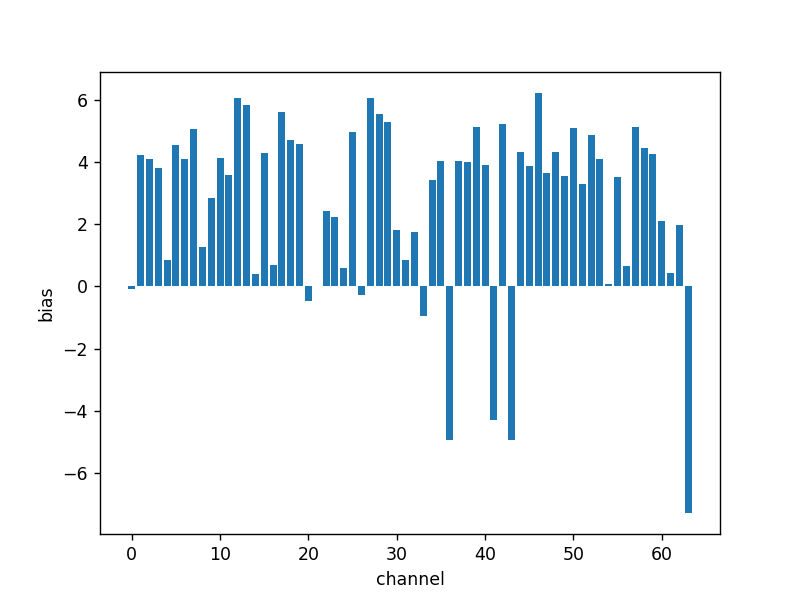

Text(0, 0.5, 'bias')

In [61]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(range(len(bias)), bias)
ax.set_xlabel('channel')
ax.set_ylabel('bias')

<IPython.core.display.Javascript object>


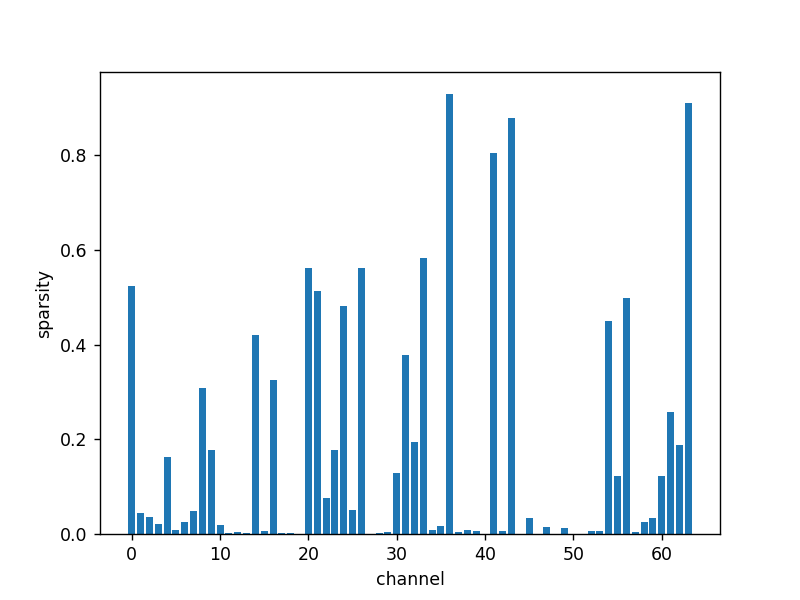

<IPython.core.display.Javascript object>


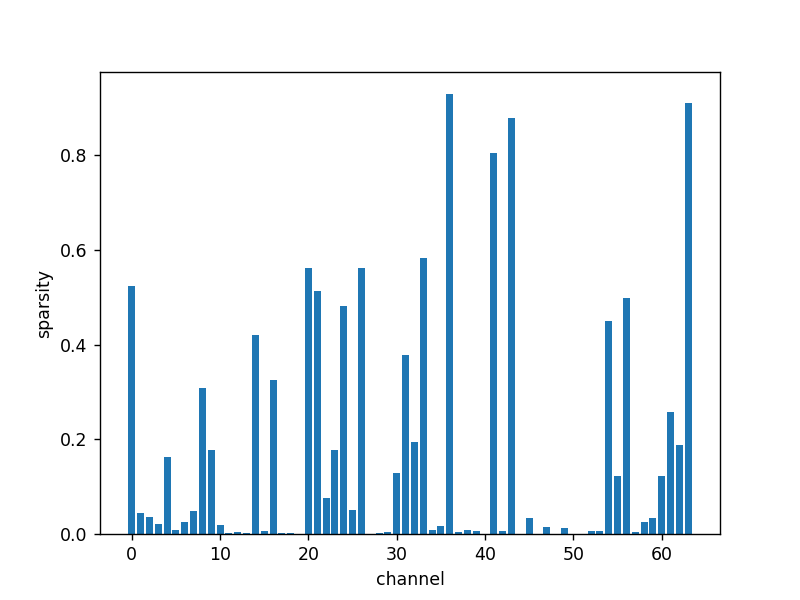

In [62]:
channel_avg1.draw()